<a href="https://colab.research.google.com/github/Naveen032006/Computer-vision/blob/main/Image_Transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter the translation distance for x (dx): 200
Enter the translation distance for y (dy): 300
2594 3620 3


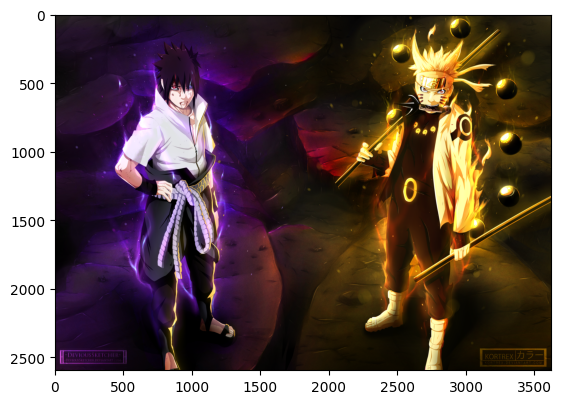

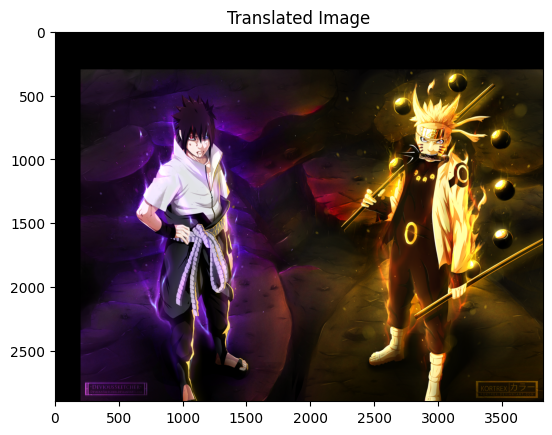

In [1]:
import cv2

import numpy as np

import matplotlib.pyplot as plt

image = cv2.imread("naruto.png")

rows, cols, channels = image.shape

dx = int(input("Enter the translation distance for x (dx): "))

dy = int(input("Enter the translation distance for y (dy): "))

translated_image = np.zeros((rows + dy, cols + dx, channels), dtype=np.uint8)

translated_image[dy:dy + rows, dx:dx + cols] = image[0:rows, 0:cols]


print(rows, cols, channels)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.show()

plt.imshow(cv2.cvtColor(translated_image, cv2.COLOR_BGR2RGB))

plt.title('Translated Image')

plt.show()

Enter the rotation angle (in degrees): 90


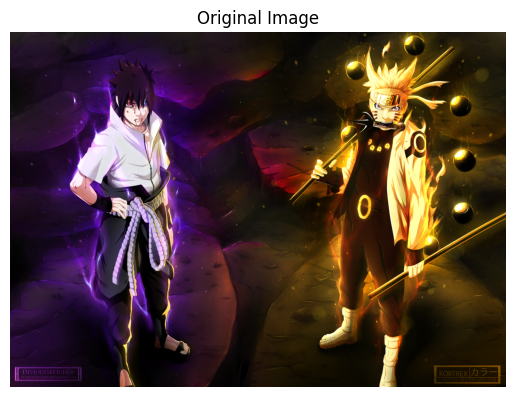

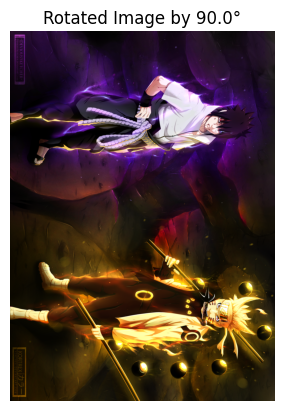

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

# Load the image
image = cv2.imread("naruto.png")
if image is None:
    print("Image not found!")
    exit()

rows, cols, channels = image.shape

# Get rotation angle from user
angle = float(input("Enter the rotation angle (in degrees): "))
theta = math.radians(angle)

# Compute the size of the new image
abs_cos = abs(math.cos(theta))
abs_sin = abs(math.sin(theta))

new_width = int(rows * abs_sin + cols * abs_cos)
new_height = int(rows * abs_cos + cols * abs_sin)

# Create a black image with the new size
rotated_image = np.zeros((new_height, new_width, channels), dtype=np.uint8)

# Find the center of the original and new image
center_x, center_y = cols // 2, rows // 2
new_center_x, new_center_y = new_width // 2, new_height // 2

# Apply rotation using backward mapping
for i in range(new_height):
    for j in range(new_width):
        x = j - new_center_x
        y = i - new_center_y

        original_x = int(x * math.cos(-theta) - y * math.sin(-theta)) + center_x
        original_y = int(x * math.sin(-theta) + y * math.cos(-theta)) + center_y

        if 0 <= original_x < cols and 0 <= original_y < rows:
            rotated_image[i, j] = image[original_y, original_x]

# Show original image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.show()

# Show rotated image
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.title(f'Rotated Image by {angle}°')
plt.axis('off')
plt.show()


Image dimensions: 2594x3620


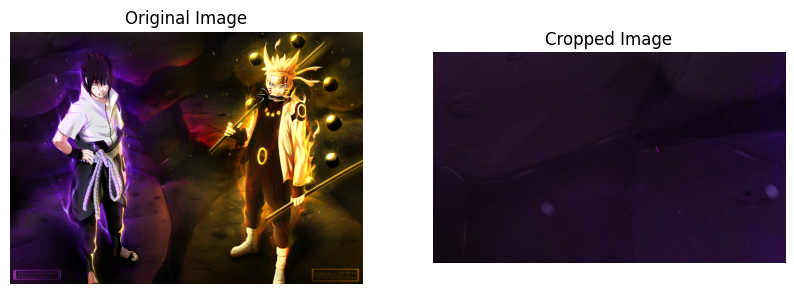

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('naruto.png')

if image is None:
    print("Error: Image not found or unable to load. Check the file path.")
    exit()

# Get image dimensions
height, width, _ = image.shape
print(f"Image dimensions: {height}x{width}")

# Define cropping area
start_row, end_row = 100, min(400, height)
start_col, end_col = 100, min(600, width)

# Perform cropping
cropped_image = image[start_row:end_row, start_col:end_col]

if cropped_image.size == 0:
    print("Error: Cropped image is empty. Check crop indices.")
    exit()

# Display original and cropped images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.title('Cropped Image')
plt.axis('off')

plt.show()


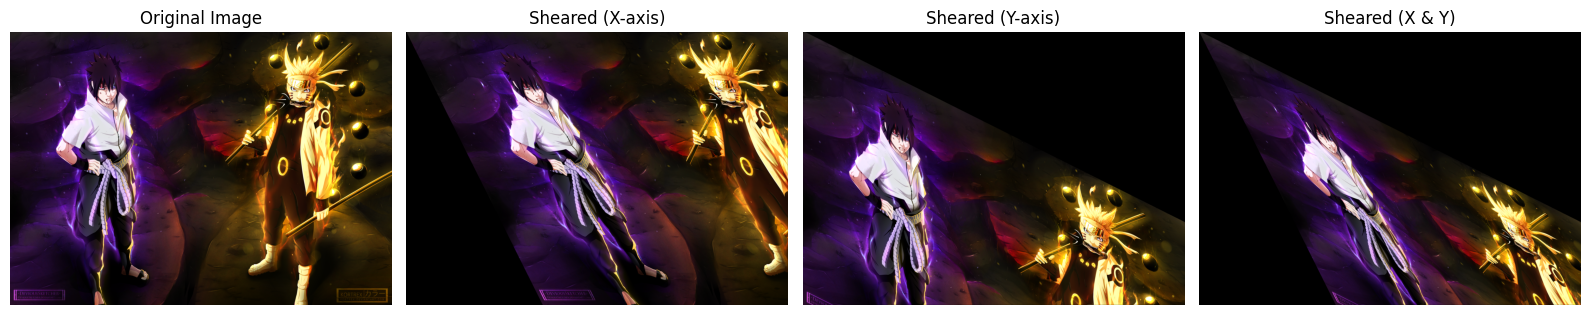

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('naruto.png')

if image is None:
    print("Error: Image not found. Check the filename/path.")
    exit()

rows, cols, channels = image.shape

# Define shear factors for X and Y directions
shear_factor_x = 0.5
shear_factor_y = 0.5

# Create coordinate grids
x_indices, y_indices = np.meshgrid(np.arange(cols), np.arange(rows))

# ---------------- Shearing in X Direction ----------------
new_x_indices = x_indices + shear_factor_x * y_indices
new_x_indices = np.clip(new_x_indices, 0, cols - 1)  # Keep within bounds

sheared_image_x = np.zeros_like(image)
sheared_image_x[y_indices, new_x_indices.astype(int)] = image[y_indices, x_indices]

# ---------------- Shearing in Y Direction ----------------
new_y_indices = y_indices + shear_factor_y * x_indices
new_y_indices = np.clip(new_y_indices, 0, rows - 1)

sheared_image_y = np.zeros_like(image)
sheared_image_y[new_y_indices.astype(int), x_indices] = image[y_indices, x_indices]

# ---------------- Shearing in Both Directions ----------------
new_x_indices_both = x_indices + shear_factor_x * y_indices
new_y_indices_both = y_indices + shear_factor_y * x_indices

new_x_indices_both = np.clip(new_x_indices_both, 0, cols - 1)
new_y_indices_both = np.clip(new_y_indices_both, 0, rows - 1)

sheared_image_xy = np.zeros_like(image)
sheared_image_xy[new_y_indices_both.astype(int), new_x_indices_both.astype(int)] = image[y_indices, x_indices]

# ---------------- Display Results ----------------
plt.figure(figsize=(16, 5))

plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Original Image')

plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(sheared_image_x, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Sheared (X-axis)')

plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(sheared_image_y, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Sheared (Y-axis)')

plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(sheared_image_xy, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Sheared (X & Y)')

plt.tight_layout()
plt.show()


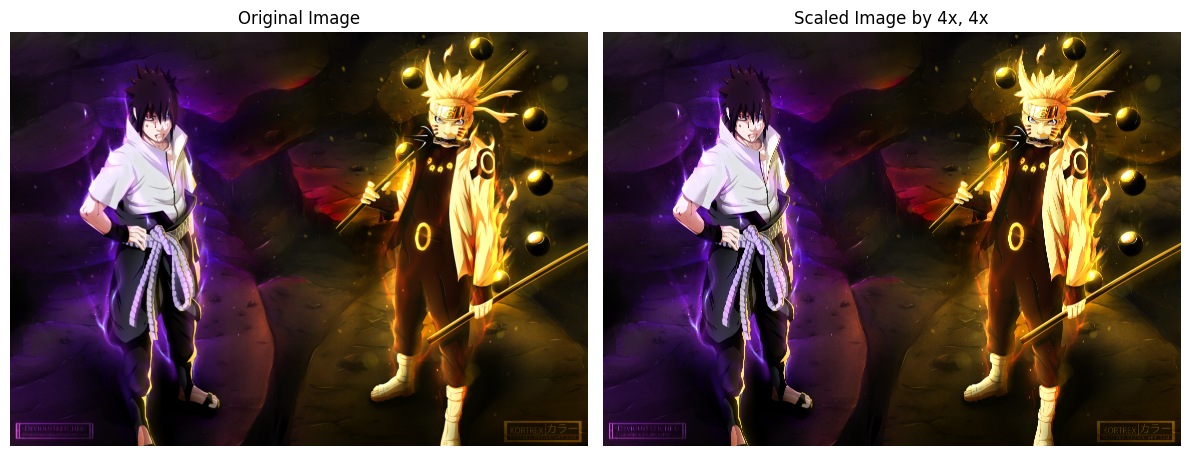

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
image = cv2.imread('naruto.png')

if image is None:
    print("Error: Image not found.")
    exit()

rows, cols, channels = image.shape

# Scaling factors
scale_x = 4
scale_y = 4

# New dimensions
new_cols = int(cols * scale_x)
new_rows = int(rows * scale_y)

# Create new index grid
x_indices, y_indices = np.meshgrid(np.arange(new_cols), np.arange(new_rows))

# Map new indices to original image coordinates (nearest neighbor)
original_x = (x_indices / scale_x).astype(int)
original_y = (y_indices / scale_y).astype(int)

# Clip to avoid index overflow
original_x = np.clip(original_x, 0, cols - 1)
original_y = np.clip(original_y, 0, rows - 1)

# Create scaled image
scaled_image = np.zeros((new_rows, new_cols, channels), dtype=np.uint8)
scaled_image[y_indices, x_indices] = image[original_y, original_x]

# Show original and scaled images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(scaled_image, cv2.COLOR_BGR2RGB))
plt.title(f'Scaled Image by {scale_x}x, {scale_y}x')
plt.axis('off')

plt.tight_layout()
plt.show()
